In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [0]:
import seaborn as sns
sns.set()

In [0]:
import warnings
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,Dropout
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

%matplotlib inline
warnings.filterwarnings("ignore")

# Set seeds to make the experiment more reproducible.
from tensorflow.compat.v1.random import set_random_seed
from numpy.random import seed
set_random_seed(1)
seed(1)

In [0]:
from scipy import stats

In [0]:
df = pd.read_csv('/content/sample_data/climate_data2.csv',sep = ';')

In [7]:
df = pd.read_csv('/content/sample_data/climate_data2.csv',sep = ';',infer_datetime_format=True,header = 0, parse_dates=['# Date'])
#dataset.head()
df['# Date'] = pd.to_datetime(df['# Date'])
df = df.set_index("# Date")
type(df.index)
df.head()

,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
# Date,,,,,,,,,,
1980-01-01,24:00,284.55,76.59,968.48,3.61,113.37,5.203010,0.4192,0.000396,2157.781
1980-01-02,24:00,284.81,56.53,971.38,1.07,62.33,0.140569,0.0000,0.000535,3758.814
1980-01-03,24:00,284.46,44.87,973.32,0.93,344.69,0.000000,0.0000,0.000280,4024.862
1980-01-04,24:00,285.08,37.16,974.53,0.26,317.64,0.000000,0.0000,0.000155,4109.105
1980-01-05,24:00,283.85,38.61,974.07,1.70,295.94,0.000000,0.0000,0.000071,4146.958


In [8]:
df = df.drop('UT time',axis = 1)
df.head()

,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
# Date,,,,,,,,,
1980-01-01,284.55,76.59,968.48,3.61,113.37,5.203010,0.4192,0.000396,2157.781
1980-01-02,284.81,56.53,971.38,1.07,62.33,0.140569,0.0000,0.000535,3758.814
1980-01-03,284.46,44.87,973.32,0.93,344.69,0.000000,0.0000,0.000280,4024.862
1980-01-04,285.08,37.16,974.53,0.26,317.64,0.000000,0.0000,0.000155,4109.105
1980-01-05,283.85,38.61,974.07,1.70,295.94,0.000000,0.0000,0.000071,4146.958


In [0]:
df = df[['Rainfall','Temperature','Relative Humidity','Pressure','Wind speed','Wind direction','Short-wave irradiation']]

In [10]:
df.head(10)

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation
# Date,,,,,,,
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958
1980-01-06,0.000000,283.92,34.20,974.23,2.36,299.91,4241.923
1980-01-07,0.000000,284.77,29.65,974.01,2.31,299.03,4097.864
1980-01-08,0.000000,284.71,30.19,973.19,1.61,298.83,4201.000
1980-01-09,0.000000,285.44,31.09,971.66,2.38,304.08,3880.444


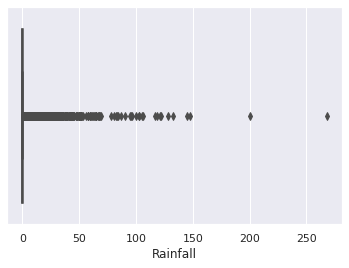

In [0]:
sns.boxplot(x = df['Rainfall'])

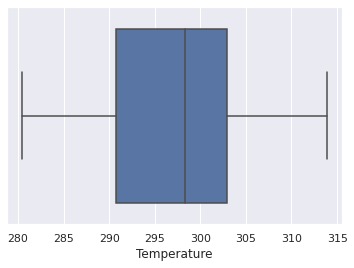

In [0]:
sns.boxplot(x = df['Temperature'])

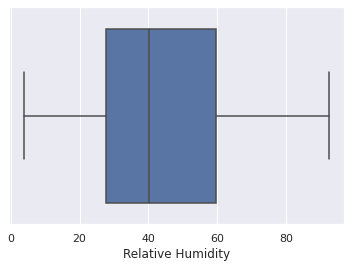

In [0]:
sns.boxplot(x = df['Relative Humidity'])

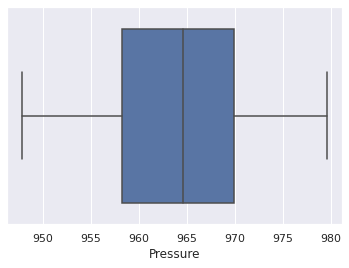

In [0]:
sns.boxplot(x = df['Pressure'])

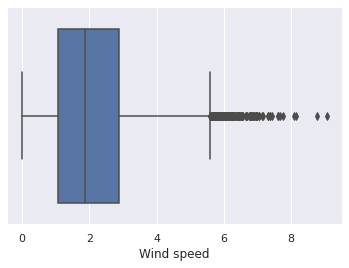

In [0]:
sns.boxplot(x = df['Wind speed'])

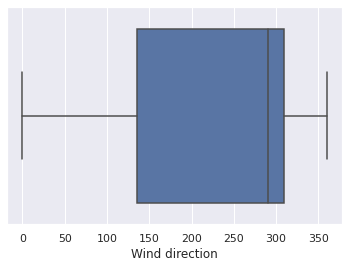

In [0]:
sns.boxplot(x = df['Wind direction'])

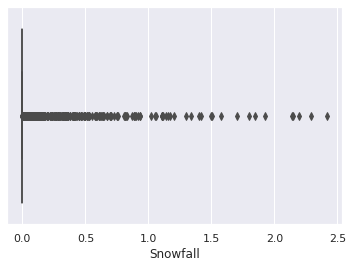

In [0]:
sns.boxplot(x = df['Snowfall'])

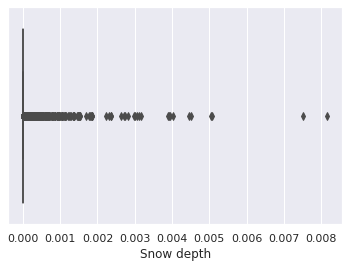

In [0]:
sns.boxplot(x = df['Snow depth'])

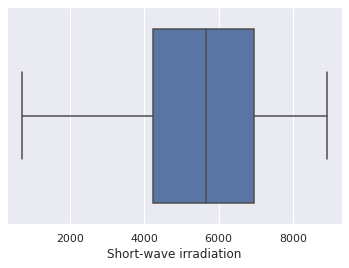

In [0]:
sns.boxplot(x = df['Short-wave irradiation'])

In [11]:
z = np.abs(stats.zscore(df))
print(z)
z.max()

[[0.5262923  1.72391599 1.5743976  ... 1.16772797 1.24289973 2.11206065]
 [0.20048662 1.68871899 0.61026602 ... 0.79537119 1.76877937 1.12750159]
 [0.22066712 1.73609956 0.04985853 ... 0.90357351 1.14045605 0.96389473]
 ...
 [0.22058831 0.51774204 0.40407836 ... 1.90968671 0.78705339 0.90012003]
 [0.22066712 0.61114945 0.45454387 ... 0.75810492 0.71946385 0.237695  ]
 [0.17793231 0.34175707 0.46367572 ... 0.63444513 0.9894099  0.26548347]]


38.24327819750121

In [12]:
threshold = 3
print(np.where(z > 3))

(array([   54,    55,   114,   194,   195,   209,   211,   214,   218,
         249,   444,   464,   465,   529,   559,   560,   562,   563,
         565,   566,   574,   575,   672,   789,   790,   813,   860,
         862,   947,  1092,  1122,  1200,  1200,  1201,  1303,  1303,
        1304,  1304,  1339,  1362,  1509,  1510,  1521,  1528,  1582,
        1583,  1603,  1604,  1681,  1706,  1707,  1882,  1883,  2037,
        2042,  2043,  2044,  2108,  2232,  2276,  2296,  2652,  2677,
        2678,  2979,  2992,  2992,  3002,  3068,  3115,  3124,  3134,
        3135,  3142,  3153,  3158,  3187,  3188,  3189,  3294,  3383,
        3384,  3388,  3415,  3416,  3482,  3483,  3497,  3498,  3526,
        3527,  3751,  3766,  3829,  3837,  3902,  4015,  4015,  4124,
        4137,  4143,  4150,  4160,  4375,  4458,  4509,  4510,  4589,
        4613,  4636,  4792,  4804,  4824,  4830,  4854,  4855,  4939,
        4939,  4940,  4946,  4950,  4951,  4997,  5124,  5125,  5164,
        5189,  5190

In [0]:
rows,columns = np.where(z>3)

In [0]:
for row,column in zip(rows,columns):
  if column == 0:
    df.iloc[row,column] = 0.931113
  if column == 4:
    df.iloc[row,column] = 2.057803
   
  
  

In [44]:
count = 0
for row,column in zip(rows,columns):
  if column == 0:
    if df.iloc[row,column] == 0.931113:
      count+=1
  if column == 4:
    if df.iloc[row,column] == 2.057803:
      count+=1
print(count)

296


Rainfall                     0.931113
Temperature                300.270000
Relative Humidity           91.220000
Pressure                   955.810000
Wind speed                   4.550000
Wind direction             132.650000
Short-wave irradiation    2230.159000
Name: 1980-07-13 00:00:00, dtype: float64

In [15]:
df.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation
# Date,,,,,,,
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958


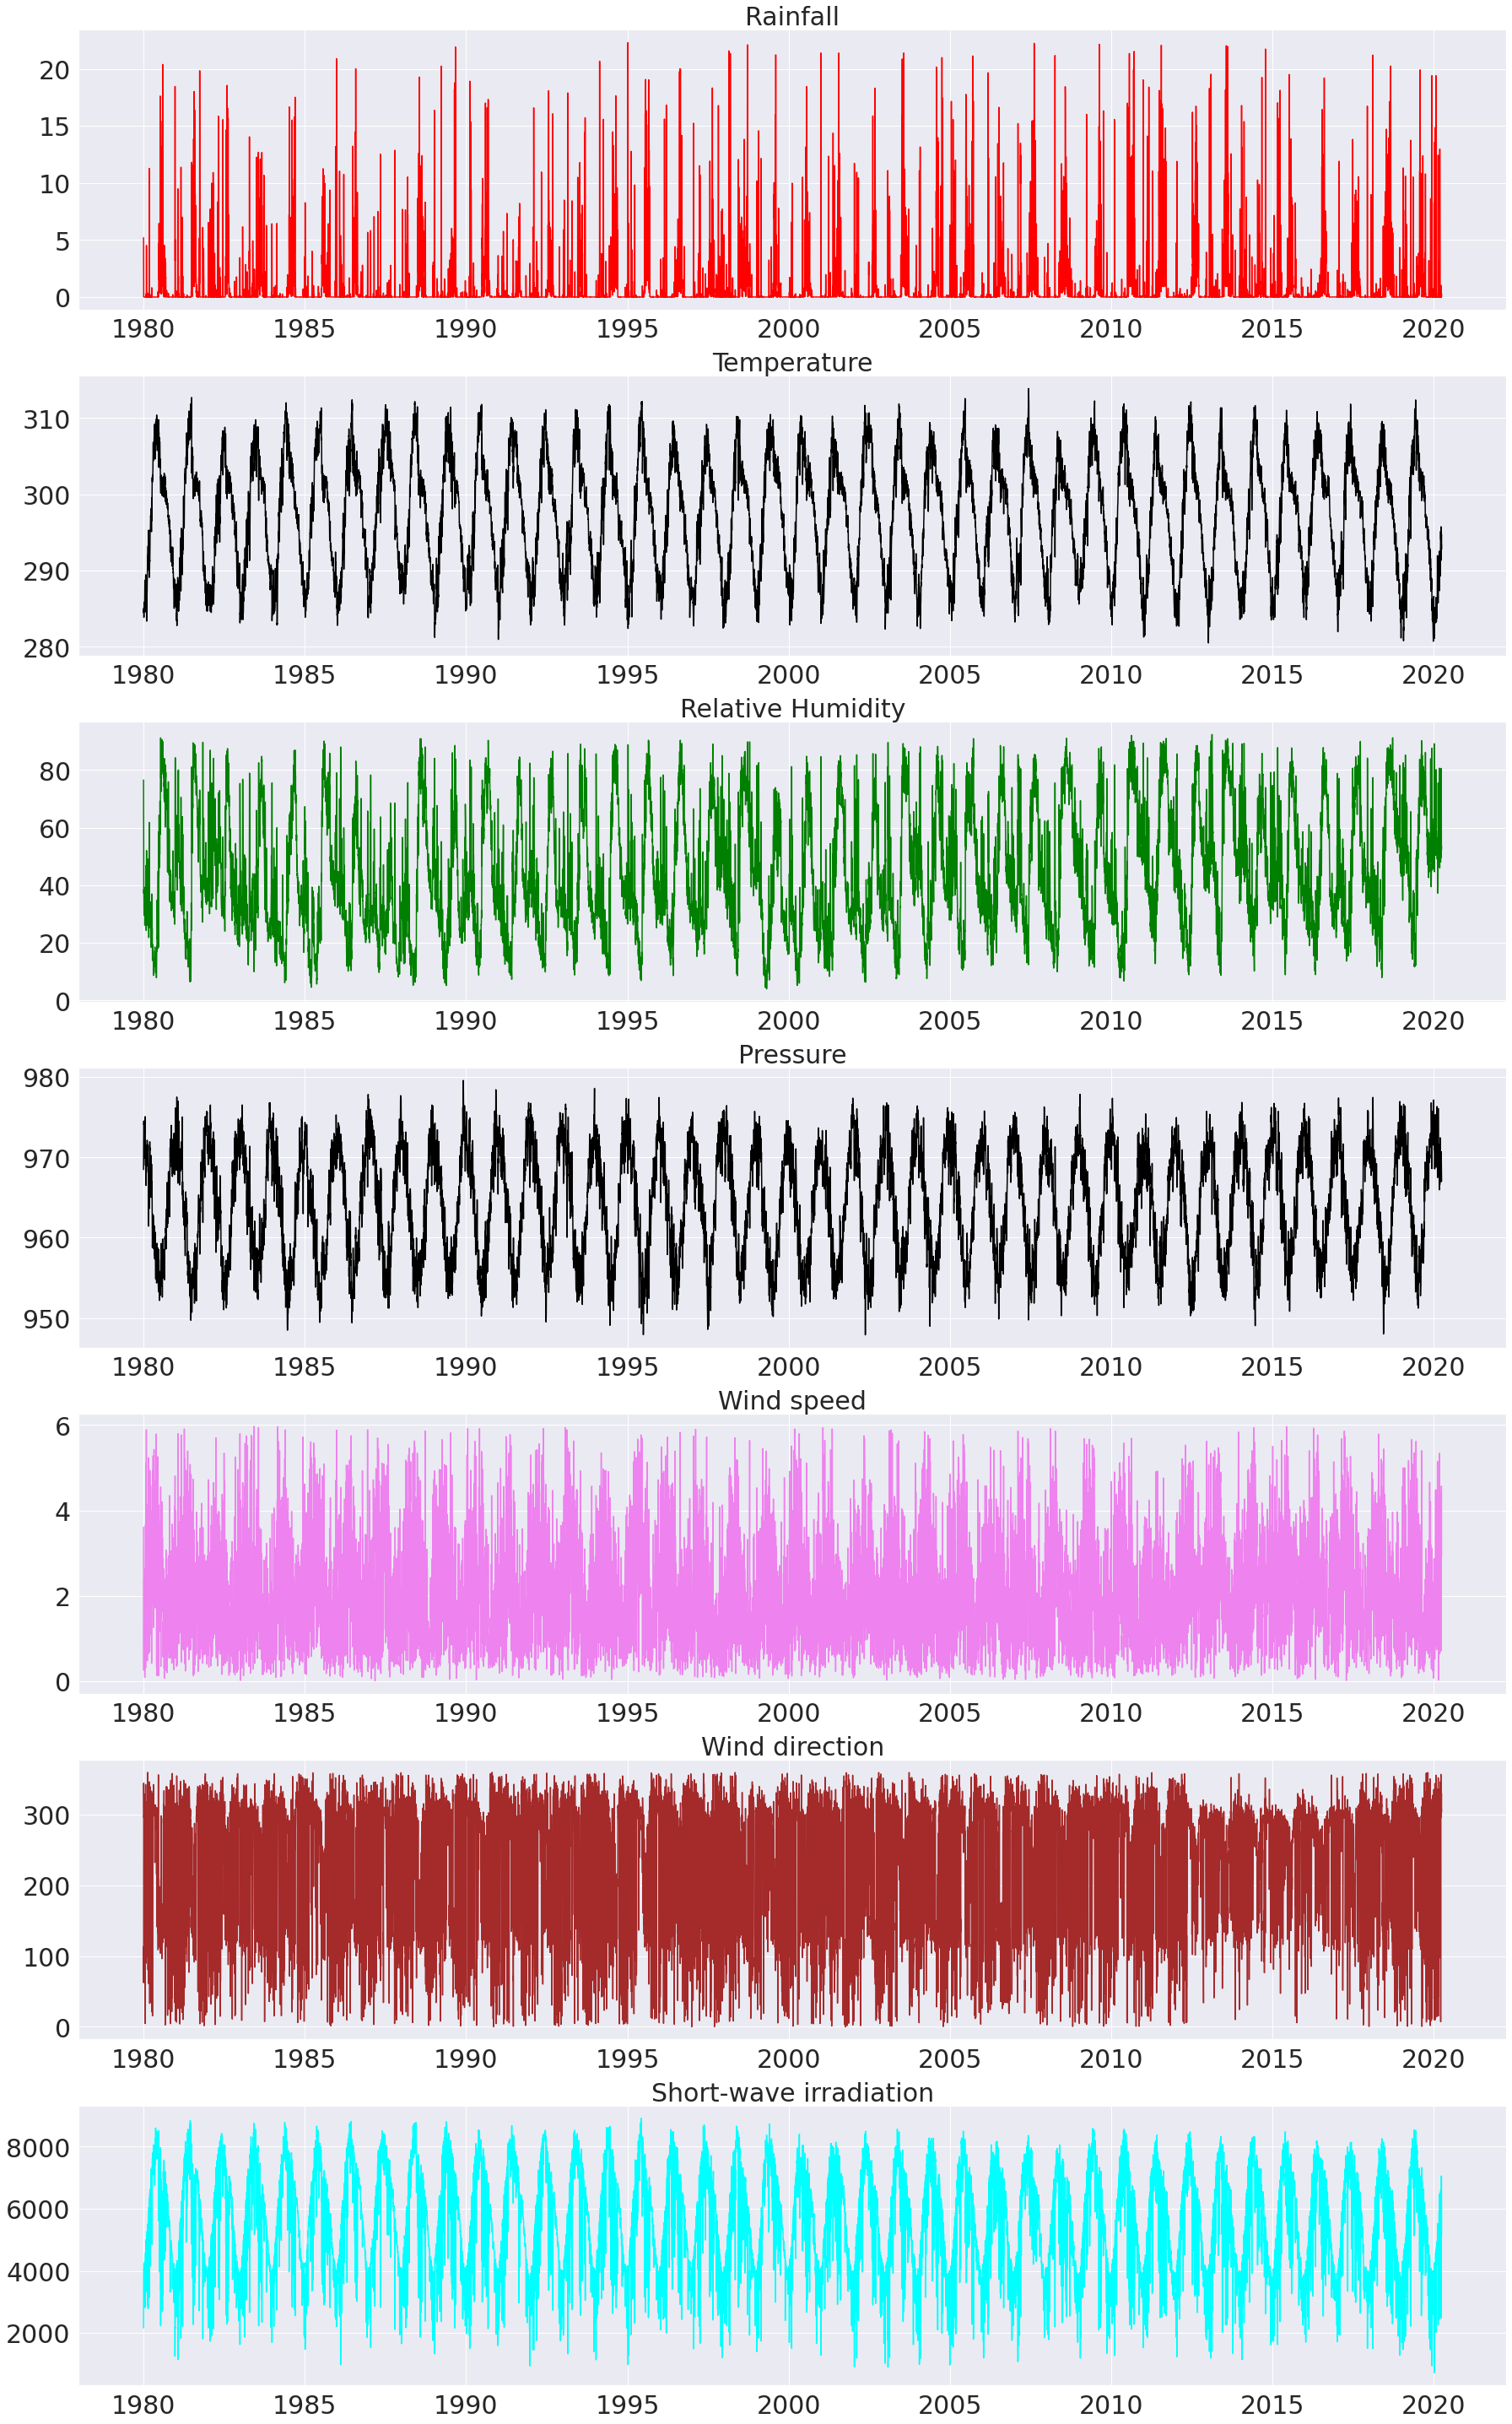

In [48]:
#plt.figure(figsize=(20,30))
#Axes.tick_params(self, axis='both', **kwargs
fig, axs = plt.subplots(7,figsize = (25,40))
#axs.set_color_cycle(['red', 'black', 'violet','blue', 'brown', 'green','cyan'])
axs[0].tick_params(labelsize=30)
axs[1].tick_params(labelsize=30)
axs[2].tick_params(labelsize=30)
axs[3].tick_params(labelsize=30)
axs[4].tick_params(labelsize=30)
axs[5].tick_params(labelsize=30)
axs[6].tick_params(labelsize=30)
axs[0].plot(df['Rainfall'],color = 'red')
axs[0].set_title('Rainfall',fontsize = 30)
axs[1].plot(df['Temperature'],color = 'black')
axs[1].set_title('Temperature',fontsize = 30)
axs[2].plot(df['Relative Humidity'],color = 'green')
axs[2].set_title('Relative Humidity',fontsize = 30)
axs[3].plot(df['Pressure'],color = 'black')
axs[3].set_title('Pressure',fontsize = 30)
axs[4].plot(df['Wind speed'],color = 'violet')
axs[4].set_title('Wind speed',fontsize = 30)
axs[5].plot(df['Wind direction'],color = 'brown')
axs[5].set_title('Wind direction',fontsize = 30)
axs[6].plot(df['Short-wave irradiation'],color = 'cyan')
axs[6].set_title('Short-wave irradiation',fontsize = 30)
fig.tight_layout()
#df.plot(subplots=True,figsize = (20,20));

In [0]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)

Rainfall                     0.282332
Temperature                 12.260000
Relative Humidity           31.880000
Pressure                    11.660000
Wind speed                   1.800000
Wind direction             173.960000
Short-wave irradiation    2729.090000
dtype: float64
Rainfall                     0.000
Temperature                290.700
Relative Humidity           27.760
Pressure                   958.310
Wind speed                   1.080
Wind direction             135.980
Short-wave irradiation    4225.203
Name: 0.25, dtype: float64
Rainfall                     0.282332
Temperature                302.960000
Relative Humidity           59.640000
Pressure                   969.970000
Wind speed                   2.880000
Wind direction             309.940000
Short-wave irradiation    6954.293000
Name: 0.75, dtype: float64


In [35]:
df.head(55)

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,"(54, 4)","(55, 4)","(114, 4)","(194, 0)","(195, 0)","(209, 0)","(211, 0)","(214, 0)","(218, 0)","(249, 0)","(444, 0)","(464, 4)","(465, 4)","(529, 4)","(559, 0)","(560, 0)","(562, 0)","(563, 0)","(565, 0)","(566, 0)","(574, 0)","(575, 0)","(672, 0)","(789, 0)","(790, 0)","(813, 0)","(860, 0)","(862, 0)","(947, 0)","(1092, 0)","(1122, 4)","(1200, 0)","(1200, 4)",...,"(12221, 0)","(12254, 0)","(12263, 0)","(12272, 0)","(12273, 0)","(12278, 0)","(12337, 0)","(12581, 4)","(12582, 4)","(12843, 0)","(12843, 4)","(13229, 4)","(13230, 4)","(13252, 4)","(13260, 4)","(13360, 0)","(13540, 0)","(13613, 4)","(13614, 4)","(13615, 4)","(13670, 4)","(13779, 0)","(13780, 0)","(14073, 0)","(14086, 0)","(14087, 0)","(14096, 0)","(14119, 0)","(14120, 0)","(14144, 0)","(14145, 0)","(14146, 0)","(14282, 0)","(14361, 4)","(14473, 0)","(14474, 0)","(14574, 0)","(14616, 0)","(14675, 0)","(14696, 0)"
# Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,0.931113,2.057803,...,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,2.057803,0.931113,2.057803,2.057803,2.057803,2.057803,2.057803,0.931113,0.931113,2.057803,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,0.931113,2.057803,...,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,2.057803,0.931113,2.057803,2.057803,2.057803,2.057803,2.057803,0.931113,0.931113,2.057803,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,0.931113,2.057803,...,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,2.057803,0.931113,2.057803,2.057803,2.057803,2.057803,2.057803,0.931113,0.931113,2.057803,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,0.931113,2.057803,...,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,2.057803,0.931113,2.057803,2.057803,2.057803,2.057803,2.057803,0.931113,0.931113,2.057803,2.057803,2.057803,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113,2.057803,0.931113,0.931113,0.931113,0.931113,0.931113,0.931113
1980-01-05,0.000000,283.85,38.61,974.0

In [19]:
df.shape

(14701, 7)

In [0]:
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

            Rainfall  Temperature  ...  Wind direction  Short-wave irradiation
# Date                             ...                                        
1980-01-01      True        False  ...           False                   False
1980-01-02     False        False  ...           False                   False
1980-01-03     False        False  ...           False                   False
1980-01-04     False        False  ...           False                   False
1980-01-05     False        False  ...           False                   False
...              ...          ...  ...             ...                     ...
2020-03-27      True        False  ...           False                   False
2020-03-28     False        False  ...           False                   False
2020-03-29     False        False  ...           False                   False
2020-03-30     False        False  ...           False                   False
2020-03-31     False        False  ...           Fal

In [0]:
dataset = df[(z < 3).all(axis=1)]

In [21]:
dataset.shape

(14417, 7)

In [0]:
df = df[~((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(11552, 7)

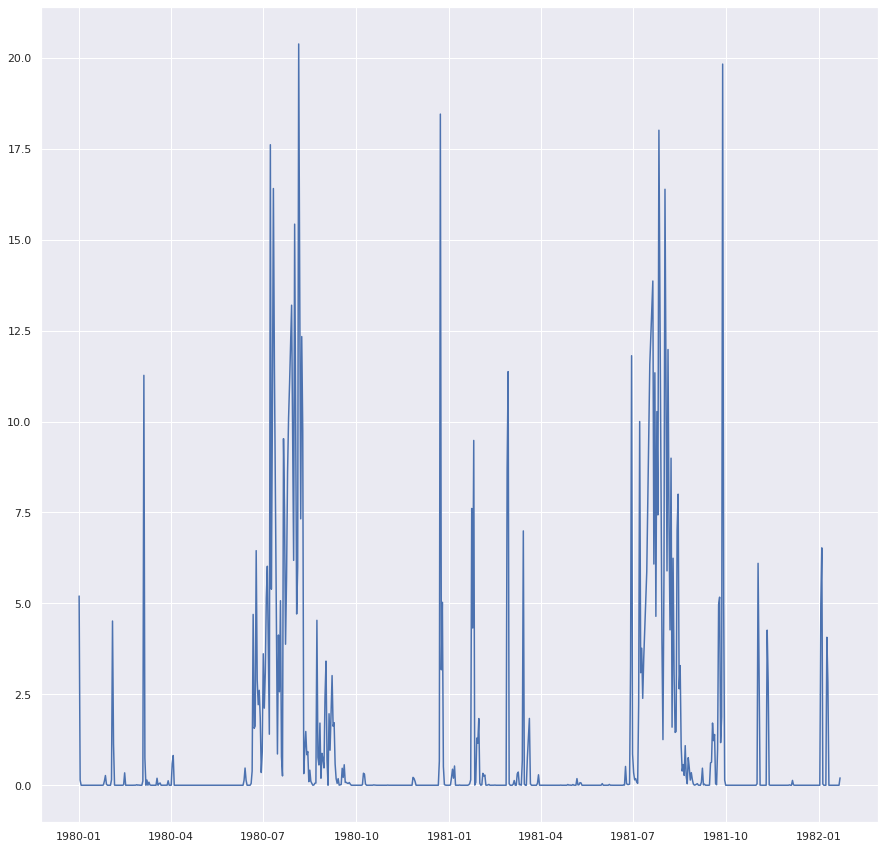

In [23]:
fig =plt.figure(figsize = (15,15))
plt.plot(dataset['Rainfall'][:730])
plt.show()

In [24]:
dataset['Rainfall'].max()

22.236714000000003

In [26]:
dataset.mean()

Rainfall                     0.931113
Temperature                297.262582
Relative Humidity           43.461880
Pressure                   964.250436
Wind speed                   2.057803
Wind direction             235.175808
Short-wave irradiation    5614.903083
dtype: float64

In [0]:
df.info()

In [0]:
df.Rainfall.value_counts()

0.000000     1949
0.000001       85
0.000002       71
0.000003       38
0.000004       24
             ... 
0.005539        1
1.308985        1
8.352799        1
17.614545       1
2.473090        1
Name: Rainfall, Length: 4800, dtype: int64

In [0]:
df.Rainfall.max()

232.59884399999999

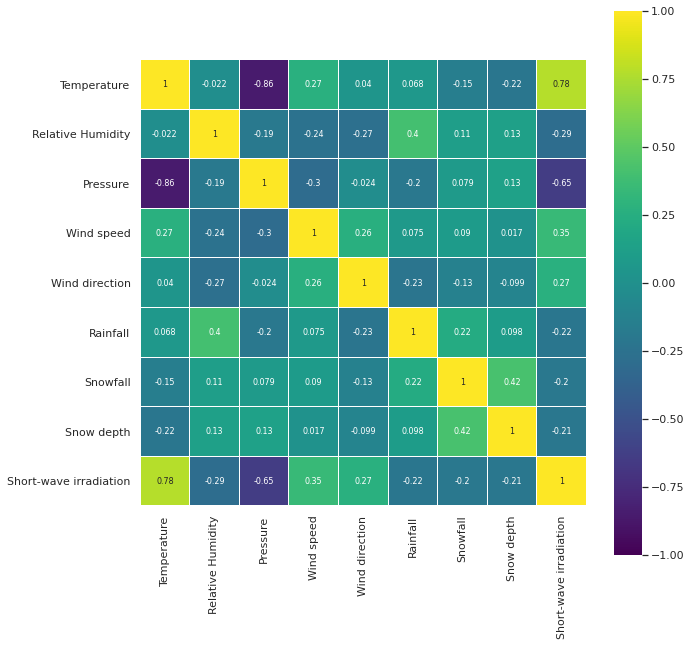

In [0]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True ,cmap = 'viridis',vmin = -1.0,vmax = 1.0, linewidths=0.1,annot_kws={"size": 8}, square=True);

count    7396.000000
mean        2.535964
std         9.005427
min         0.000000
25%         0.000000
50%         0.010896
75%         1.056160
max       232.598844
Name: Rainfall, dtype: float64


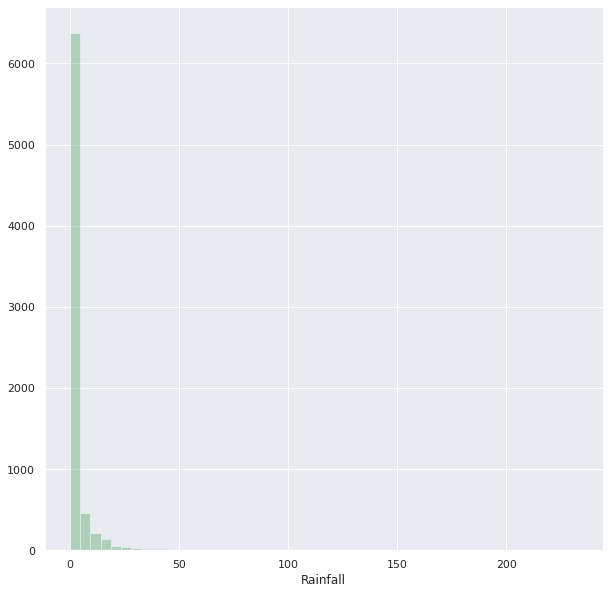

In [0]:
print(df.Rainfall.describe())
fig = plt.figure(figsize = (10,10))
sns.distplot(df['Rainfall'],color = 'g',bins= 50,hist_kws = {'alpha':0.4},kde = False);

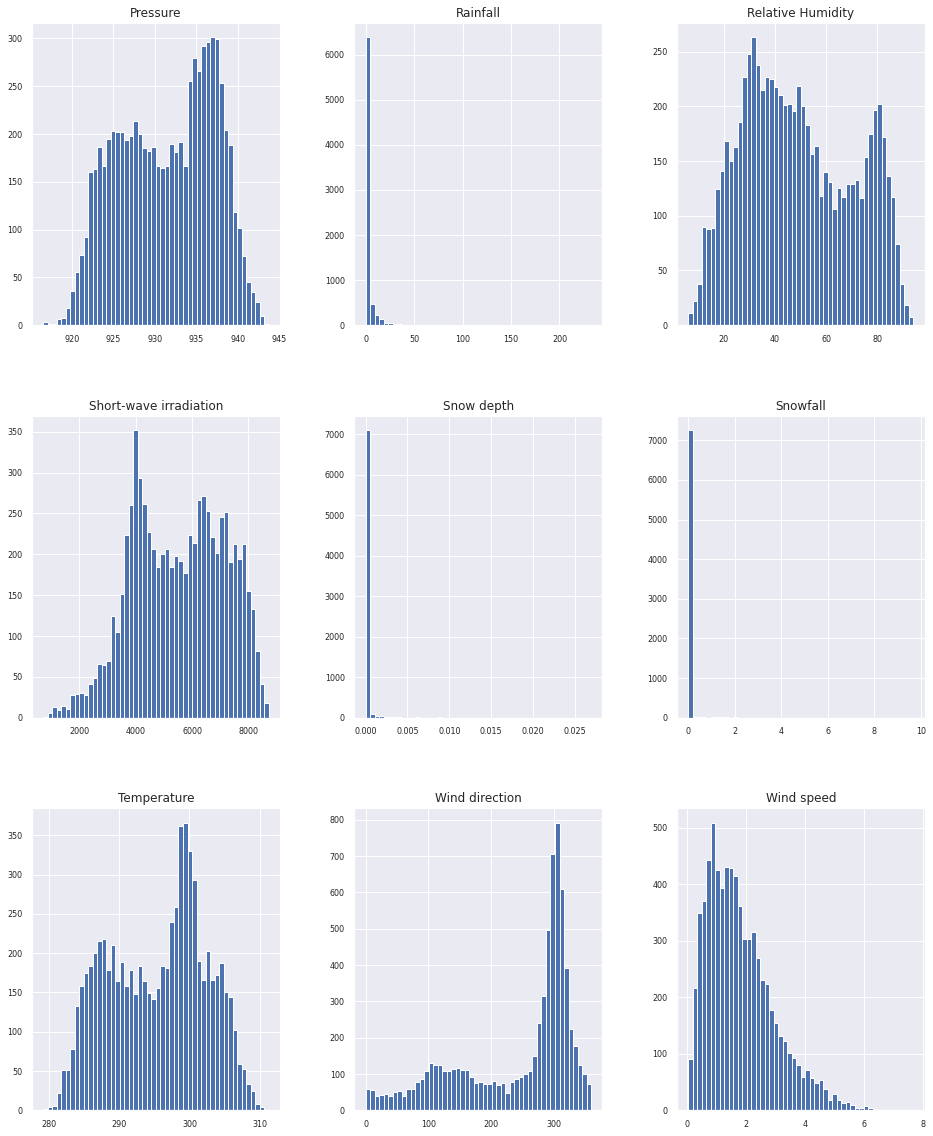

In [0]:
df.hist(figsize = (16,20),bins = 50,xlabelsize=8, ylabelsize=8);

In [0]:
df.Snowfall.describe()

count    7396.000000
mean        0.035805
std         0.349950
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.677621
Name: Snowfall, dtype: float64

In [0]:
df['Snow depth'].describe()

count    7396.000000
mean        0.000133
std         0.000936
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.026954
Name: Snow depth, dtype: float64

<Figure size 720x720 with 0 Axes>

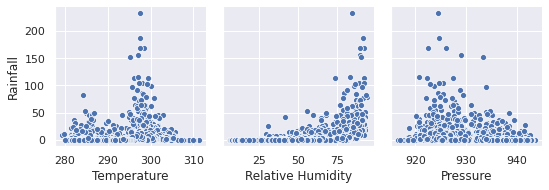

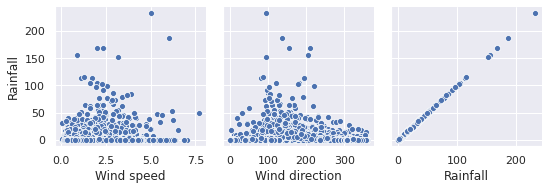

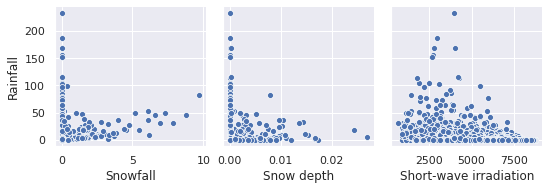

In [0]:
df_num = df.select_dtypes(include = ['float64'])
fig = plt.figure(figsize=(10,10));
for i in range(0,len(df_num.columns),3):
  sns.pairplot(data = df_num,
               x_vars = df_num.columns[i:i+3],
               y_vars= ['Rainfall']);

In [0]:
df_corr = df.corr()['Rainfall']
golden_features = df_corr[abs(df_corr) > 0.1].sort_values(ascending = False)
print("There is {} strongly correlated values with Rainfall:\n{}".format(len(golden_features), golden_features))

There is 6 strongly correlated values with Rainfall:
Rainfall                  1.000000
Relative Humidity         0.399606
Snowfall                  0.219839
Pressure                 -0.197063
Short-wave irradiation   -0.217600
Wind direction           -0.225243
Name: Rainfall, dtype: float64


snowfall is not at every place as we see in hist plot that most of the values are zero.But it has strong correlation with Rainfall.Shall we ignore it or not?

['Temperature', 'Relative Humidity', 'Pressure', 'Wind speed', 'Wind direction', 'Rainfall', 'Snowfall', 'Snow depth', 'Short-wave irradiation']


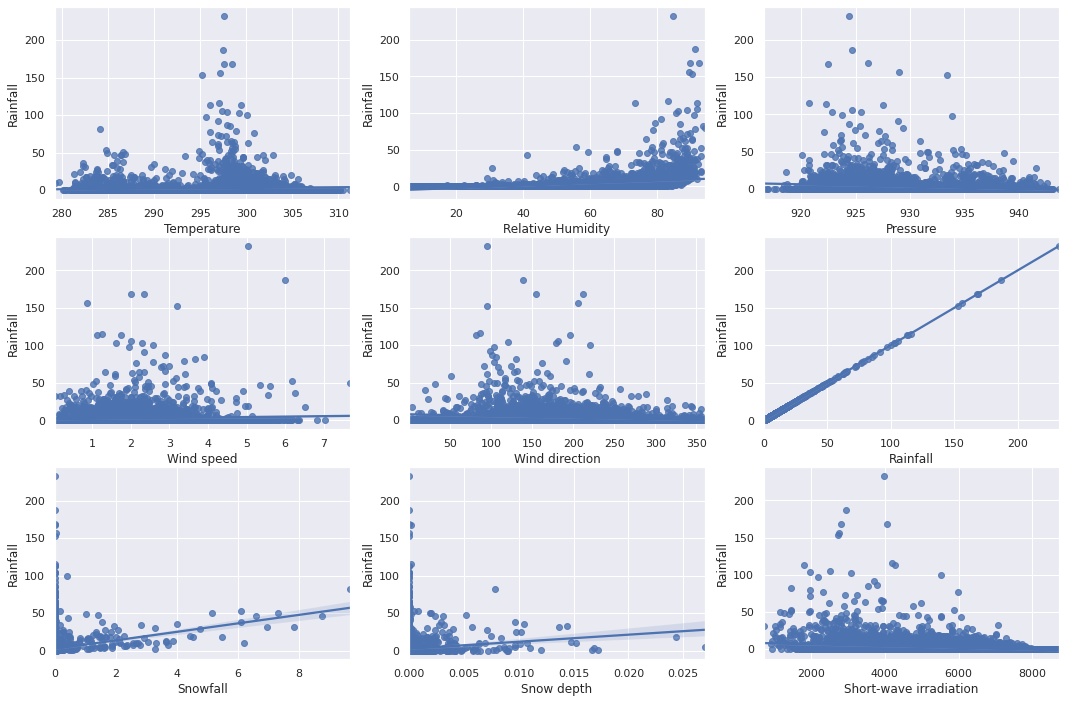

In [0]:
features = df_num.columns.tolist()
print(features)
fig,ax = plt.subplots(round(len(features)/3),3,figsize=  (18,12))
for i,ax in enumerate(fig.axes):
  if i < len(features):
    sns.regplot(x = features[i],y = 'Rainfall',data = df_num , ax = ax)

In [0]:
df.head()

,# Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,2000-01-01,24:00,286.69,20.42,938.00,0.34,359.45,0.0,0.0,0.0,4057.961
1,2000-01-02,24:00,286.54,20.20,937.75,0.19,359.78,0.0,0.0,0.0,4090.309
2,2000-01-03,24:00,286.15,19.93,936.07,0.23,328.13,0.0,0.0,0.0,4117.362
3,2000-01-04,24:00,286.06,20.16,936.70,0.38,301.85,0.0,0.0,0.0,4137.729
4,2000-01-05,24:00,285.80,19.69,937.07,1.47,307.53,0.0,0.0,0.0,4169.898


In [0]:
df1 = df.drop(['# Date','UT time','Snowfall','Snow depth'],axis = 1)

In [0]:
df1 = df1[['Temperature','Relative Humidity','Pressure','Wind speed','Wind direction','Short-wave irradiation','Rainfall']]

In [0]:
df1.head(10)

,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,Rainfall
0,286.69,20.42,938.00,0.34,359.45,4057.961,0.000000
1,286.54,20.20,937.75,0.19,359.78,4090.309,0.000000
2,286.15,19.93,936.07,0.23,328.13,4117.362,0.000000
3,286.06,20.16,936.70,0.38,301.85,4137.729,0.000000
4,285.80,19.69,937.07,1.47,307.53,4169.898,0.000000
5,286.45,17.90,935.92,1.28,303.85,4186.541,0.000000
6,287.19,17.67,936.32,0.53,301.13,3049.708,0.000624
7,286.91,23.52,935.40,0.36,306.93,2584.090,0.008618
8,286.15,48.55,935.38,2.57,99.98,1679.291,1.366863
9,287.51,40.76,935.77,1.36,84.95,1737.651,0.181598


In [0]:
df1.shape

(7396, 7)

In [0]:
df2 = df['Rainfall']
df2 = pd.DataFrame(df2)
type(df2)

pandas.core.frame.DataFrame

In [0]:
values = df2.values
scaler = StandardScaler()
scaled = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled,columns = df2.columns)

In [0]:
def to_supervised(data,n_in = 1,n_out = 1,dropnan = True):
  cols, names =list(),list()
  # Input sequence (t-n, ... t-1)
  for i in range(n_in,0,-1):
    cols.append(data.shift(i))
    names +=[('%s(t-%d)'%(col,i)) for col in data.columns]
  # Current timestep (t=0)
  cols.append(data)
  names += [('%s(t)'%(col)) for col in data.columns]   
  # Target timestep (t=n_out)
  cols.append(data.shift(-n_out))
  names += [('%s(t+%d)'%(col,n_out)) for col in data.columns]
  # Put it all together
  agg = pd.concat(cols,axis = 1)
  agg.columns =  names
  if dropnan:
        agg.dropna(inplace=True)
  return agg      
   

In [0]:
n_in = 5
n_out = 1
series = to_supervised(df2,n_in = n_in,n_out = n_out)
series.head()

,Rainfall(t-5),Rainfall(t-4),Rainfall(t-3),Rainfall(t-2),Rainfall(t-1),Rainfall(t),Rainfall(t+1)
5,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000624
6,0.0,0.0,0.000000,0.000000,0.000000,0.000624,0.008618
7,0.0,0.0,0.000000,0.000000,0.000624,0.008618,1.366863
8,0.0,0.0,0.000000,0.000624,0.008618,1.366863,0.181598
9,0.0,0.0,0.000624,0.008618,1.366863,0.181598,0.151281


In [0]:

series = series.drop(series.columns[-9:-1],axis = 1)  
series.head()

,Rainfall(t+1)
5,0.000624
6,0.008618
7,1.366863
8,0.181598
9,0.151281


In [0]:
label_col = 'Rainfall(t+%d)'%(n_out)
print(label_col)
y = series[label_col]
y = pd.DataFrame(y)
x = series.drop(label_col,axis = 1)
x.head()
y.head()


Rainfall(t+1)


,Rainfall(t+1)
5,0.000624
6,0.008618
7,1.366863
8,0.181598
9,0.151281


In [0]:

#a = sc.fit_transform(x)
#x = pd.DataFrame(a,columns= x.columns.values)
#y = y.values.reshape((len(y),1))
#c = sc.fit_transform(y)
#y = pd.DataFrame(c)

In [0]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.2,random_state = 0)
x_valid,x_test,y_valid,y_test = train_test_split(x_valid,y_valid,test_size = 0.5,random_state = 0)

print('Train set shape', x_train.shape)
print('Validation set shape', x_valid.shape)
x_train.head()

Train set shape (5912, 6)
Validation set shape (739, 6)


,Rainfall(t-5),Rainfall(t-4),Rainfall(t-3),Rainfall(t-2),Rainfall(t-1),Rainfall(t)
665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4278,2.598377,4.873565,7.401920,77.612436,0.944332,0.244627
1100,0.810627,0.007619,0.000000,0.000046,0.000000,0.000000
2481,0.027763,0.060060,0.005249,0.000000,0.000330,0.000218
6475,0.323674,0.011717,0.000204,0.801751,58.545396,36.013536


In [0]:
epochs = 200
batch = 16
lr = 0.0001
adam = optimizers.Adam(lr)
sgd = SGD(lr = 0.03,momentum = 0.9)

In [0]:
model_mlp = Sequential()
model_mlp.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model_mlp.add(Dense(128, activation='relu'))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(1,activation ='linear'))
model_mlp.compile(loss='mae', optimizer=sgd,metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 17,089
Trainable params: 17,089
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_train.values

array([1.15859987e-01, 5.95918697e-05, 7.11611017e-03, ...,
       1.02386708e-02, 3.71854815e-04, 1.65658261e-02])

In [0]:
mlp_history = model_mlp.fit(x_train.values, y_train, validation_data=(x_valid.values, y_valid), epochs=epochs, verbose=2)

Train on 5912 samples, validate on 739 samples
Epoch 1/200
 - 0s - loss: 2.5712 - accuracy: 0.2495 - val_loss: 2.0810 - val_accuracy: 0.2625
Epoch 2/200
 - 0s - loss: 2.3960 - accuracy: 0.2459 - val_loss: 2.3413 - val_accuracy: 0.2382
Epoch 3/200
 - 0s - loss: 2.4191 - accuracy: 0.2412 - val_loss: 2.2148 - val_accuracy: 0.2517
Epoch 4/200
 - 0s - loss: 2.3601 - accuracy: 0.2483 - val_loss: 2.4081 - val_accuracy: 0.2517
Epoch 5/200
 - 0s - loss: 2.3538 - accuracy: 0.2442 - val_loss: 2.6185 - val_accuracy: 0.2598
Epoch 6/200
 - 0s - loss: 2.3429 - accuracy: 0.2500 - val_loss: 2.1928 - val_accuracy: 0.2585
Epoch 7/200
 - 0s - loss: 2.3369 - accuracy: 0.2464 - val_loss: 2.0687 - val_accuracy: 0.2625
Epoch 8/200
 - 0s - loss: 2.4208 - accuracy: 0.2197 - val_loss: 2.3461 - val_accuracy: 0.2585
Epoch 9/200
 - 0s - loss: 2.3700 - accuracy: 0.2253 - val_loss: 2.3924 - val_accuracy: 0.2503
Epoch 10/200
 - 0s - loss: 2.2422 - accuracy: 0.2561 - val_loss: 2.5096 - val_accuracy: 0.2639
Epoch 11/200

In [0]:
x_test.shape

(1477, 99)

In [0]:
results = model_mlp.evaluate(x_test,y_test,verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [2.6733437436198026, 0.2395128607749939]


In [0]:
x_train.reset_index(drop =True,inplace = True)
x_train.head()
x_valid.reset_index(drop =True,inplace = True)
x_valid.head()
x_test.reset_index(drop =True,inplace = True)
x_test.head()

,Rainfall(t-5),Rainfall(t-4),Rainfall(t-3),Rainfall(t-2),Rainfall(t-1),Rainfall(t)
0,0.000000,0.000000,0.000000,0.001049,0.002885,0.000005
1,0.000801,0.000000,0.000000,0.000376,0.036036,0.000220
2,0.000000,0.000000,0.000989,0.000194,0.000000,0.000000
3,0.040023,0.016452,0.001585,0.000000,0.000000,0.003196
4,0.007220,0.082876,0.025596,0.105619,0.000149,0.000000


In [0]:
y_train.reset_index(drop = True,inplace = True)
y_valid.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)
y_test.head()

,Rainfall(t+1)
0,0.000000
1,0.000003
2,0.054457
3,0.000000
4,0.000000


In [0]:
x_train_series = x_train.values.reshape((x_train.shape[0], n_in+1, 1))
x_valid_series = x_valid.values.reshape((x_valid.shape[0], n_in+1, 1))
print('Train set shape', x_train_series.shape)
print('Validation set shape', x_valid_series.shape)

Train set shape (5912, 6, 1)
Validation set shape (739, 6, 1)


In [0]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(x_train_series.shape[1], x_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=adam,metrics = ['accuracy'])
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 5, 64)             192       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4, 64)             8256      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [0]:
cnn_history = model_cnn.fit(x_train_series, y_train, validation_data=(x_valid_series, y_valid),batch_size=batch, epochs=epochs, verbose=2)

Train on 5912 samples, validate on 739 samples
Epoch 1/200
 - 1s - loss: 88.7868 - accuracy: 0.2410 - val_loss: 77.8565 - val_accuracy: 0.2368
Epoch 2/200
 - 1s - loss: 77.6838 - accuracy: 0.2199 - val_loss: 70.8834 - val_accuracy: 0.2057
Epoch 3/200
 - 1s - loss: 72.7321 - accuracy: 0.0644 - val_loss: 65.4697 - val_accuracy: 0.0000e+00
Epoch 4/200
 - 1s - loss: 69.4760 - accuracy: 1.6915e-04 - val_loss: 62.2878 - val_accuracy: 0.0014
Epoch 5/200
 - 1s - loss: 67.4914 - accuracy: 5.0744e-04 - val_loss: 64.4610 - val_accuracy: 0.0000e+00
Epoch 6/200
 - 1s - loss: 67.0693 - accuracy: 1.6915e-04 - val_loss: 60.7813 - val_accuracy: 0.0000e+00
Epoch 7/200
 - 1s - loss: 66.3177 - accuracy: 3.3829e-04 - val_loss: 61.1239 - val_accuracy: 0.0000e+00
Epoch 8/200
 - 1s - loss: 65.8272 - accuracy: 3.3829e-04 - val_loss: 60.3007 - val_accuracy: 0.0000e+00
Epoch 9/200
 - 1s - loss: 65.4812 - accuracy: 3.3829e-04 - val_loss: 60.3985 - val_accuracy: 0.0041
Epoch 10/200
 - 1s - loss: 65.4060 - accuracy

In [0]:
x_test_series = x_test.values.reshape((x_test.shape[0], n_in+1, 1))

print('test set shape', x_test_series.shape)


test set shape (739, 11, 1)


In [0]:
results = model_cnn.evaluate(x_test_series,y_test,verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [46.00947007113445, 0.22327469289302826]


In [0]:
input_x = x_test_series[10].reshape((1,x_test_series.shape[1],x_test_series.shape[2]))

In [0]:
predictions = model_cnn.predict(input_x)
predictions

array([[0.99342006]], dtype=float32)

In [0]:
y_test.values[10]

array([0.035236])

In [0]:
model_lstm = Sequential()
model_lstm.add(LSTM(100, activation='relu',return_sequences=True ,input_shape=(x_train_series.shape[1], x_train_series.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(100, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(100,activation = 'relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer=adam,metrics = ['accuracy'])
model_lstm.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 100)            40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 131,401
Trainable params: 131,401
Non-trainable params: 0
________________________________________________

Train on 5912 samples, validate on 739 samples
Epoch 1/200
 - 4s - loss: 64.7869 - accuracy: 0.1191 - val_loss: 58.8679 - val_accuracy: 0.2422
Epoch 2/200
 - 4s - loss: 64.4882 - accuracy: 0.1385 - val_loss: 58.4748 - val_accuracy: 0.2179
Epoch 3/200
 - 4s - loss: 63.2890 - accuracy: 0.1363 - val_loss: 58.6631 - val_accuracy: 0.2436
Epoch 4/200
 - 3s - loss: 63.5089 - accuracy: 0.1345 - val_loss: 57.9561 - val_accuracy: 0.2003
Epoch 5/200
 - 4s - loss: 63.2092 - accuracy: 0.1470 - val_loss: 57.4227 - val_accuracy: 0.2341
Epoch 6/200
 - 4s - loss: 64.3826 - accuracy: 0.1343 - val_loss: 57.5389 - val_accuracy: 0.2490
Epoch 7/200
 - 4s - loss: 64.2583 - accuracy: 0.1468 - val_loss: 57.2993 - val_accuracy: 0.2490
Epoch 8/200
 - 4s - loss: 62.6090 - accuracy: 0.1566 - val_loss: 57.4073 - val_accuracy: 0.2395
Epoch 9/200
 - 4s - loss: 62.9645 - accuracy: 0.1395 - val_loss: 58.8819 - val_accuracy: 0.0000e+00
Epoch 10/200
 - 4s - loss: 63.7965 - accuracy: 0.1514 - val_loss: 57.6033 - val_accur

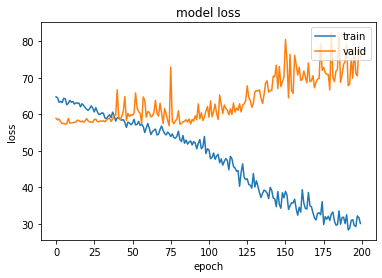

In [0]:
lstm_history = model_lstm.fit(x_train_series, y_train, validation_data=(x_valid_series, y_valid), epochs= epochs,batch_size=batch, verbose=2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [0]:
results = model_lstm.evaluate(x_test_series,y_test,verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [43.36764405577044, 0.23139376938343048]


In [0]:
x_test_series.shape

NameError: ignored